# Practicle Simple Linear Regression

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
df=pd.read_csv('27.11 Dataset/SOCR-HeightWeight.csv')

In [17]:
df.head()

,"Index,Height(Inches),Weight(Pounds)",index,Unnamed: 2,Unnamed: 3,Height,Unnamed: 5,Weight
0,"1,65.78331,112.9925",1,"65.78331,112.9925",NaN,65.78331,NaN,112.9925
1,"2,71.51521,136.4873",2,"71.51521,136.4873",NaN,71.51521,NaN,136.4873
2,"3,69.39874,153.0269",3,"69.39874,153.0269",NaN,69.39874,NaN,153.0269
3,"4,68.2166,142.3354",4,"68.2166,142.3354",NaN,68.21660,NaN,142.3354
4,"5,67.78781,144.2971",5,"67.78781,144.2971",NaN,67.78781,NaN,144.2971


In [19]:
df.drop("index",axis=1,inplace=True)

In [21]:
df.drop(['Index,Height(Inches),Weight(Pounds)','Unnamed: 2','Unnamed: 3','Unnamed: 5'],axis=1,inplace=True)


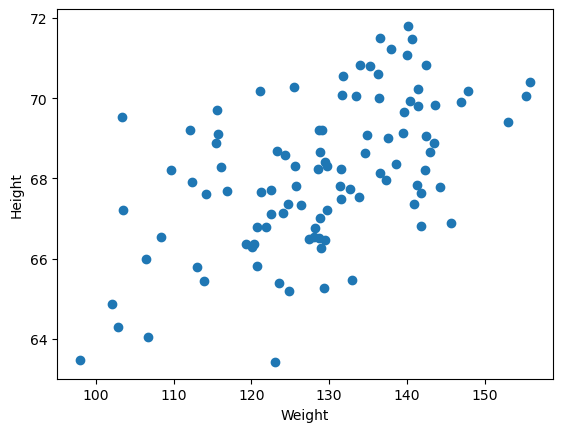

In [27]:
# Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [29]:
# Correlation
df.corr()

,Height,Weight
Height,1.000000,0.547448
Weight,0.547448,1.000000


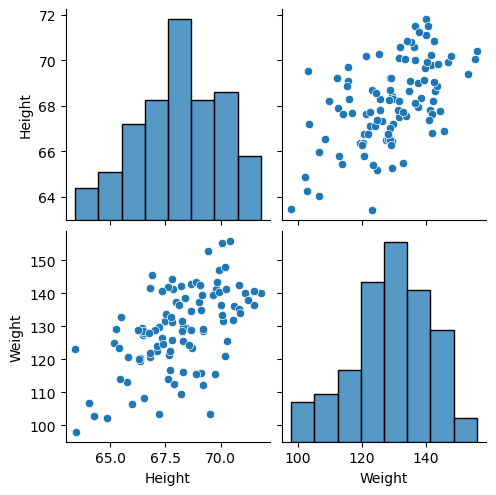

In [33]:
# Seaborn as sns
import seaborn as sns
sns.pairplot(df)
plt.show()

In [23]:
 # Independent and dependent features
x=df[['Weight']]       ## independent features shoude be data frame  or 2 dimensional
y=df['Height']    ## this variable can be in series or 1D array

In [25]:
x_series=df['Weight']
np.array(x_series).shape

(101,)

In [27]:
np.array(y).shape

(101,)

In [29]:
# Train Test split
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [35]:
# standrardization
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.44314409],
       [ 0.92316124],
       [-0.75774081],
       [-0.81215584],
       [-1.31358003],
       [ 1.01625549],
       [ 0.49032877],
       [-1.80862301],
       [-0.05277357],
       [-0.5332309 ],
       [-1.08559411],
       [-1.18021338],
       [-0.06922502],
       [-0.00502092],
       [-0.6528298 ],
       [ 0.89799418],
       [ 0.58794696],
       [ 0.66524577],
       [-2.27697392],
       [ 0.16945307],
       [-0.46997248],
       [ 0.33190582],
       [ 0.01390123],
       [ 0.01696831],
       [ 0.4576133 ],
       [-0.60484711],
       [ 1.04696884],
       [ 1.08831472],
       [ 1.14266159],
       [ 0.15220929],
       [-1.46443754],
       [-0.59954789],
       [ 1.01668999],
       [-1.69966517],
       [ 1.04264938],
       [-0.71889119],
       [ 2.24386086],
       [-2.34022382],
       [-0.51731619],
       [ 1.48758827],
       [-2.21798384],
       [ 1.37357827],
       [-0.41161285],
       [ 0.6802148 ],
       [-0.12081152],
       [ 0

In [163]:
x_test=scaler.transform(x_test)
x_test

array([[-0.03918473],
       [ 1.5617689 ],
       [ 1.09964586],
       [ 0.27158667],
       [-0.06793004],
       [-1.94671807],
       [-2.6972646 ],
       [-1.96900549],
       [-0.17973345],
       [-1.41159865],
       [ 0.71064701],
       [-2.23722973],
       [-0.55071323],
       [ 0.56751683],
       [ 0.28934163],
       [ 1.25544476],
       [-1.48411794],
       [-1.18746361],
       [-0.33657175],
       [-0.75037983],
       [ 0.7703783 ],
       [ 0.1662582 ],
       [ 1.09582053],
       [ 0.86132559],
       [-0.02108898],
       [ 0.88913374]])

In [165]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [167]:
regression=LinearRegression(n_jobs=-1)

In [169]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [171]:
print('Cofficient or slope :',regression.coef_)
print('Intercept:',regression.intercept_)

Cofficient or slope : [0.89304257]
Intercept: 68.18430266666667


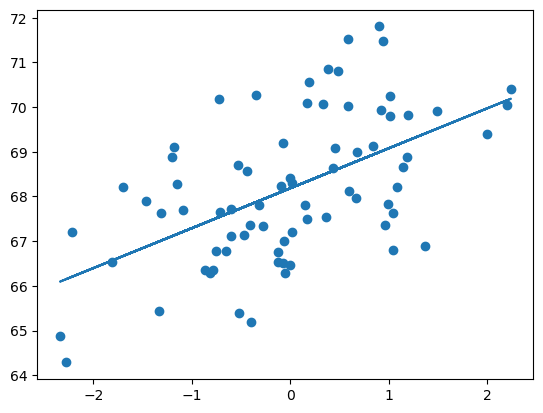

In [173]:
# Plot Trining data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))
plt.show()

# Prediction of text data
1. prediction height output=intercept +coef_(Weights)
2. y_pred_test=68.18430266666667+0.89304257(x_text)

In [176]:
# Pridiction for the text data
y_pred=regression.predict(x_test)

In [178]:
# Performnace Metrix
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [187]:
mse=mean_squared_error(y_text,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

3.7992257213284857
1.6268906534741707
1.9491602605554232


# R Square
formula

R^2=1-SSR/SST
1. R^2=Coefficent of detemination 
2. SSR=sum of squares of residuals
3. SST=total sum of squares

In [183]:
from sklearn.metrics import r2_score

In [185]:
score=r2_score(y_test,y_pred)
print(score)

0.28943064206372826


# Adjusted R2=1-[(1-R2)*(n-1)/(n-k-1)]
where:
1. R2 : The R2 of the model
2.  n:The number of obserbation
3.  k : The number of predictor variables

In [194]:
# Display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.2598235854830503

In [200]:
# OLS Linear Regression
import statsmodels.api as sm

In [202]:
model=sm.OLS(y_train,x_train).fit()

In [204]:
prediction=model.predict(x_test)

In [206]:
print(prediction)

[-0.03499363  1.39472611  0.98203056  0.24253846 -0.06066441 -1.73850211
 -2.40877211 -1.75840572 -0.16050962 -1.26061768  0.63463803 -1.99794139
 -0.49181036  0.50681669  0.25839439  1.12116561 -1.32538049 -1.06045555
 -0.3005729  -0.67012113  0.68798061  0.14847565  0.97861438  0.76920042
 -0.01883336  0.79403428]


In [210]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.013
Method:                 Least Squares   F-statistic:                            0.01269
Date:                Mon, 28 Jul 2025   Prob (F-statistic):                       0.911
Time:                        12:05:51   Log-Likelihood:                         -423.10
No. Observations:                  75   AIC:                                      848.2
Df Residuals:                      74   BIC:                                      850.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [214]:
# Prediction for new data
regression.predict(scaler.transform([[72]]))

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.80480624])